In [1]:
import pandas as pd
import numpy as np

In [2]:

lcn=pd.read_csv(r"D:\python files\LungCapData.csv")

In [3]:
lcn.head()

,LungCap,Age,Height,Smoke,Gender,Caesarean
0,6.475,6,62.1,no,male,no
1,10.125,18,74.7,yes,female,no
2,9.550,16,69.7,no,female,yes
3,11.125,14,71.0,no,male,no
4,4.800,5,56.9,no,male,no


In [4]:
# IMP
# steps involve in model building
# 1. understand the requirements / problem statement
# 2. get the data 
# 3. data pre-processing / data cleaning ( null , rename, replace,non-numeric number ets)
# 4. Sampling(random sampling)
# 5. build the model
# 6. Test the model and check the model performance
# 7. re-run from some previous step

#Dont forget step 3 & 4.

In [5]:
# 1. understand the requirements / problem statement
#to build predictive model which can predict the lung cap

In [6]:
lcn.isnull().sum()

LungCap      0
Age          0
Height       0
Smoke        0
Gender       0
Caesarean    0
dtype: int64

In [7]:
# 3. data pre-processing / data cleaning
lcn.Smoke=lcn.Smoke.replace({'no':0,'yes':1})
lcn.Gender=lcn.Gender.replace({'male':1,'female':0})
lcn.Caesarean=lcn.Caesarean.replace({'no':0,'yes':1})

In [8]:
lcn.head()

,LungCap,Age,Height,Smoke,Gender,Caesarean
0,6.475,6,62.1,0,1,0
1,10.125,18,74.7,1,0,0
2,9.550,16,69.7,0,0,1
3,11.125,14,71.0,0,1,0
4,4.800,5,56.9,0,1,0


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
lcn_train,lcn_test=train_test_split(lcn,test_size=.2)

In [11]:
lcn_train_x=lcn_train.iloc[:,1::]
lcn_train_y=lcn_train.iloc[:,0]

In [12]:
lcn_test_x=lcn_test.iloc[:,1::]
lcn_test_y=lcn_test.iloc[:,0]

In [13]:
#import necc function from sklearn
#create an object of that function model is created
#run the fit function model is created
#run the prediction function(prediction is done)

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
linreg=LinearRegression()

In [16]:
linreg.fit(lcn_train_x,lcn_train_y)

LinearRegression()

In [17]:
lcn_train_x.head()

,Age,Height,Smoke,Gender,Caesarean
277,13,66.0,0,1,1
199,12,66.4,0,0,0
627,6,49.2,0,0,0
391,16,71.2,0,0,0
27,9,65.6,0,1,0


In [18]:
Rsquare=linreg.score(lcn_train_x,lcn_train_y)
Rsquare

0.8532464635516183

In [19]:
N=lcn_train_x.shape[0]
K=lcn_train_x.shape[1]

In [20]:
Adj_Rsquare=1-(1-Rsquare)*(N-1)/(N-K-1)
Adj_Rsquare

0.8519681226417892

In [21]:
lcn_train_x.columns 

Index(['Age', 'Height', 'Smoke', 'Gender', 'Caesarean'], dtype='object')

In [22]:
linreg.coef_

array([ 0.15719573,  0.26251836, -0.65016114,  0.43113561, -0.17364093])

In [23]:
linreg.intercept_#Bo(bita not value)

-11.212399804905935

In [24]:
#y=mx+c
#if value of m and c  are know then we can do the prediction
 
#m is 3, c is 4.5

In [25]:
lcn_test_x.head(1)

,Age,Height,Smoke,Gender,Caesarean
131,17,75.7,0,0,0


In [26]:
#pred_test values how calculated
#  linreg.intercept_+linreg.coef_*Age+linreg.coef_*Height-----like
-11.185990309135645+0.16563992*12+0.26107828*60.7+ -0.54841684*0+ 0.3868378*0+ -0.20520628*0

#pred test first value

6.649140326864355

In [27]:
#pred_test first value
#pred_test

In [28]:
pred_train=linreg.predict(lcn_train_x)
pred_test=linreg.predict(lcn_test_x)

In [29]:
err_test= lcn_test_y-pred_test
err_test

131    1.592433
623   -0.257511
265    0.925402
439    2.543462
250   -0.185692
         ...   
454    0.443845
105    0.279222
7     -2.104181
351    0.856048
456   -0.596990
Name: LungCap, Length: 145, dtype: float64

In [30]:
err_test.head()

131    1.592433
623   -0.257511
265    0.925402
439    2.543462
250   -0.185692
Name: LungCap, dtype: float64

In [43]:
mse=np.mean(np.square(err_test))
mse

0.983533158777759

In [44]:
rmse=np.sqrt(mse)
rmse

0.9917324028072084

In [45]:
mape=np.mean(np.abs(err_test* 100 / lcn_test_y))
mape

15.2286441913671

In [35]:
#build linrregression model propery price
#build linrregression model car price

# next class 23-07-22

In [36]:
#lets check the assumation  

In [37]:
err_train=lcn_train_y-pred_train  

In [38]:
np.mean(err_train) 
#1st check
#mean of the error should be close zero if assumation are holding true
#mean is not close to zero some problem(assumtion getting  broken)

4.37198170386872e-16

In [ ]:
#-1.807749352510341e-15 ==>  0.00000000000000807749352510341 both values same

In [39]:
import matplotlib.pyplot as plt

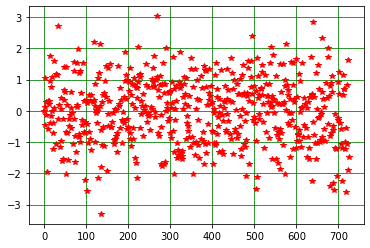

In [40]:
plt.plot(err_train,'*',color='r');
plt.grid(color='g')

In [41]:
# i am not able to find any patteren
#  but few values liitle far away from mean

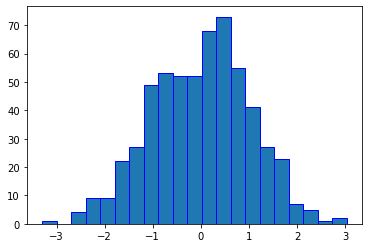

In [42]:
#to check normal distrubtion we plot histrogram
plt.hist(err_train,bins=21,edgecolor='b');


In [46]:
pred_acutual_df=pd.DataFrame() # create empty dataframe

In [47]:
pred_acutual_df['Actual']=lcn_train_y
pred_acutual_df['Predict']=pred_train

In [48]:
pred_acutual_df #actual,predicted dataframe

,Actual,Predict
277,6.700,8.414851
199,7.575,8.105168
627,2.925,2.646678
391,11.325,9.994039
27,9.025,7.854702
...,...,...
205,5.850,4.469476
287,3.025,2.174145
168,6.050,6.935887
271,8.800,9.495885


In [49]:
import seaborn as sns

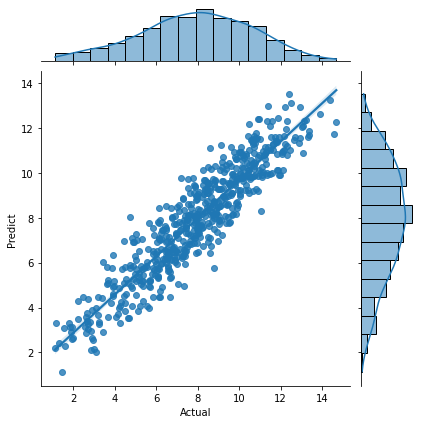

In [50]:
sns.jointplot(x='Actual', y='Predict', data=pred_acutual_df, kind='reg') #kind=reg 'reg' means its regression plot 

In [51]:
# x=actual value
# y= predicted values
#so guys ,this is regression plot on this plot on x-axis we take actual, on y-axis we predicted values
#some points away from regression line this point we called as outliers.  

In [52]:
def remove_outliers(df, col, k):
    mean= df[col].mean()
    global df1
    sd= df[col].std()
    final_list=[x for x in df[col] if (x > mean-k*sd)]
    final_list= [x for x in final_list if (x < mean + k*sd)]
    df1 =df.loc[df[col].isin(final_list)] ; print(df1.shape)
    print('number of outliers removed ==>', df.shape[0] - df1.shape[0])

In [53]:
# df1 is the final dataframe where outliers have been removed   

In [56]:
remove_outliers(lcn,'LungCap',2)

(695, 6)
number of outliers removed ==> 30


In [55]:
lcn.head()

,LungCap,Age,Height,Smoke,Gender,Caesarean
0,6.475,6,62.1,0,1,0
1,10.125,18,74.7,1,0,0
2,9.550,16,69.7,0,0,1
3,11.125,14,71.0,0,1,0
4,4.800,5,56.9,0,1,0
